<a href="https://colab.research.google.com/github/G-Srinandan/AIML_Projects_and_Labs/blob/main/Module_3_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
#TOPIC : EUCLIDIAN DISTANCE
#NAIVE APPROACH
x , y = np.array((1,2)) , np.array((4,6))
sum = 0
for i in range(len(x)):
  sum += (x[i]-y[i])**2
ans = math.sqrt(sum)
print(ans)

5.0


In [6]:
## TASK-1
## Write a vectorized version of computing Euclidean distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'euclidean_dist'
## Verify this result with what you saw above

# Write your code below and uncomment the lines below in order to run the cell.

#dist = np.sqrt(np.sum((x - y)**2))

euclidian_dist = np.linalg.norm(x-y)
print(euclidian_dist)

5.0


In [7]:
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points
euclidean_dist = distance.euclidean(x, y)
print(euclidean_dist)

5.0


In [8]:
# 3-D Visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)
tempeuclid = np.sqrt((meshx**2 + meshy**2))
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempeuclid, x=plotx, y=plotx)])
fig.update_layout(title='Euclidean Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

In [10]:
#MANHATTAN DISTANCE
# | X1 - X2| + | Y1 - Y2|
# Libraries such as SciPy provide functions to compute different kinds of distance metrics between points

manhattan_dist = distance.cityblock(x, y)
print(manhattan_dist)

7


In [11]:
## TASK-2
## Write a vectorized version of computing Manhattan distance (using numpy) in the space given below
## (Expected number of lines ~ 1). Your answer should be stored in the variable 'manhattan_dist'
## Verify your result with the output of the scipy function in the previous cell.

# Write your code below and uncomment the lines below in order to run the cell.

manhattan_dist = np.sum(np.abs(x-y))
print(manhattan_dist)

7


In [12]:
# 3-D visualization
plotx = np.linspace(-10,10,50)
meshx, meshy = np.meshgrid(plotx,plotx)
tempmanhattan = np.abs(meshx) + np.abs(meshy)
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=tempmanhattan, x=plotx, y=plotx)])
fig.update_layout(title='Manhattan Distance from origin', autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

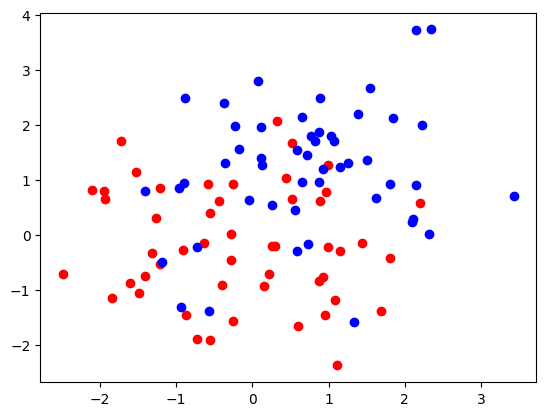

In [13]:
#KNN CLASSIFIER

import random
import scipy.stats as ss
from sklearn.neighbors import KNeighborsClassifier
def generate_synth_data(n = 50):
    points = np.concatenate((ss.norm(0, 1).rvs((n, 2)), ss.norm(1, 1).rvs((n, 2))), axis = 0)
    outcomes = np.concatenate((np.repeat(0, n), np.repeat(1, n)))
    return (points, outcomes)

n = 50
pts,tgts = generate_synth_data(n) #generates 100 points
# print(tgts)
plt.figure()
plt.plot(pts[:n, 0], pts[:n, 1], "ro")
plt.plot(pts[n:, 0], pts[n:, 1], "bo")
plt.show()

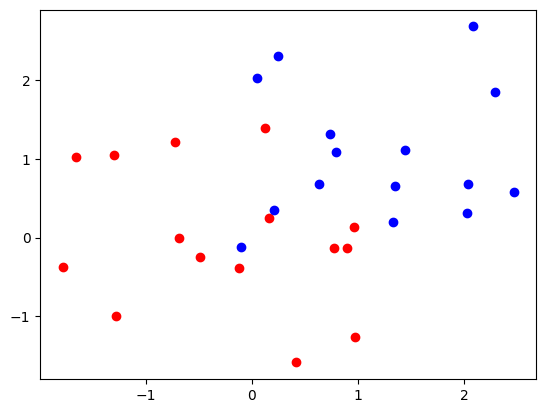

In [14]:
n = 15
test_pts,test_tgts = generate_synth_data(n)
# print(test_tgts)
plt.figure()
plt.plot(test_pts[:n, 0], test_pts[:n, 1], "ro")
plt.plot(test_pts[n:, 0], test_pts[n:, 1], "bo")
plt.show()


You need to pass `params` (like `p=1` or `p=2`) **only for the `minkowski` distance**, because it is a **generalized distance metric** that depends on the power parameter `p`.

---

### 📐 What is the Minkowski Distance?

The Minkowski distance between two points $(x_1, x_2, ..., x_n)$ and $(y_1, y_2, ..., y_n)$ is defined as:

$$
D(x, y) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{1/p}
$$

* If `p = 1` → **Manhattan distance**
* If `p = 2` → **Euclidean distance**
* If `p → ∞` → **Chebyshev distance**

---

###  Why `params` only for Minkowski?

When using:

```python
KNeighborsClassifier(metric='minkowski', p=3)
```

You're telling the model:

* Use the **Minkowski formula**
* Use `p = 3` for computing distance

But for predefined metrics like `'euclidean'`, `'manhattan'`, or `'chebyshev'`, you **don’t need to specify `p`**, because:

* `euclidean` is already `p=2`
* `manhattan` is already `p=1`
* `chebyshev` uses `∞` norm

In [15]:

metrics = [
    ("euclidean", {}),
    ("manhattan", {}),
    ("chebyshev", {}),
    ("minkowski", {"p": 1}),
    ("minkowski", {"p": 2}),
    ("hamming", {})
]

for metric_name, params in metrics:
    print(f"\nMetric: {metric_name}, Params: {params}")

    knn = KNeighborsClassifier(n_neighbors=3, metric=metric_name, **params)
    knn.fit(pts, tgts)
    our_predictions = knn.predict(test_pts)

    acc = 100 * np.mean(our_predictions == test_tgts)
    print(f"Prediction Accuracy: {acc:.2f}%")



Metric: euclidean, Params: {}
Prediction Accuracy: 73.33%

Metric: manhattan, Params: {}
Prediction Accuracy: 76.67%

Metric: chebyshev, Params: {}
Prediction Accuracy: 73.33%

Metric: minkowski, Params: {'p': 1}
Prediction Accuracy: 76.67%

Metric: minkowski, Params: {'p': 2}
Prediction Accuracy: 73.33%

Metric: hamming, Params: {}
Prediction Accuracy: 50.00%


 Why does Hamming Distance give low accuracy in your KNN experiment?

Because Hamming distance is not meant for real-valued (continuous) numerical data like your 2D Gaussian clusters. It's designed for categorical or binary data — like strings or bit-vectors.

KNN on a Real World dataset

The Iris flower data set or Fisher's Iris data set is a multivariate data set that consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
# data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data['target'] = pd.Series(iris.target)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [18]:
np.random.seed(123)
indices = np.random.permutation(data.shape[0])
div = int(0.65 * len(indices))
train_idx, test_idx = indices[:div], indices[div:]

train_set, test_set = data.loc[train_idx,:], data.loc[test_idx,:]
test_class = list(test_set.iloc[:,-1])
train_class = list(train_set.iloc[:,-1])

def dist_euclidean(X1,X2):
    return distance.euclidean(X1,X2)
def dist_cosine(X1,X2):
    return distance.cosine(X1,X2)
def dist_manhattan(X1,X2):
    return distance.cityblock(X1,X2)
def dist_chebyshev(X1,X2):
    return distance.chebyshev(X1,X2)
metrics_list = [dist_euclidean,dist_cosine, dist_manhattan, dist_chebyshev]
for dist_metric in metrics_list:
  knn = KNeighborsClassifier(n_neighbors = 3, metric=dist_metric)
  knn.fit(train_set, train_class)
  our_predictions = knn.predict(test_set)
  print(dist_metric.__name__)
  print("Prediction Accuracy: ")
  print(100 * np.mean(our_predictions == test_class))
  print()

dist_euclidean
Prediction Accuracy: 
100.0

dist_cosine
Prediction Accuracy: 
100.0

dist_manhattan
Prediction Accuracy: 
100.0

dist_chebyshev
Prediction Accuracy: 
100.0



How are similarity and distance different from each other?


| **Aspect**      | **Similarity**                                                                              | **Distance**                                                       |
| --------------- | ------------------------------------------------------------------------------------------- | ------------------------------------------------------------------ |
| **Definition**  | A measure of how alike two objects are                                                    | A measure of how different two objects are                       |
| **Value Range** | Usually higher value = more similar (e.g., cosine similarity ranges from -1 to 1 or 0 to 1) | Usually lower value = more similar (distance of 0 means identical) |
| **Goal**        | Maximize similarity (closer = more related)                                                 | Minimize distance (closer = more related)                          |
| **Examples**    | Cosine similarity, Jaccard similarity                                                       | Euclidean, Manhattan, Chebyshev distances                          |
| **Usage**       | Used in clustering, recommendation systems, etc.                                            | Used in classification, nearest neighbors, etc.                    |


Are there any conditions for a particular distance to be considered a "distance metric"?

Yes. For a function
𝑑
(
x , y
)
d(x,y) to be called a distance metric, it must satisfy these four properties:

1. Non-negativity:
𝑑
(
x , y
)
≥
0


Distance is always positive or zero

2. Identity of indiscernibles:
𝑑
(
x , y
)
=
0
 if and only if x == y



Only identical points have distance zero

3. Symmetry: 𝑑
(
x , y
)
=
𝑑
(
 y , x
)


Order of comparison doesn’t matter

4. Triangle inequality:  d(x , z) ≤ d(x , y) + d( y , z)

Going through an intermediate point should not reduce total distance

If any of these four conditions fail, then the function is not a valid distance metric.